# DATASCIENCE INTERNSHIP

##                           BHARAT INTERN

###        TASK 2 : TITANIC CLASSIFICATION
####                          by Pratham Priyanshu Mohanty 

### OBJECTIVE :-A MODEL which tells whether the person will be save from sinking or not



### INTRODUCTION:-
 The Titanic was a British passenger liner that tragically sank on its maiden voyage from Southampton, England to New York City on April 15, 1912. The ship collided with an iceberg in the North Atlantic Ocean, leading to one of the most infamous maritime disasters in history.

At the time of the collision, the Titanic was carrying an estimated 2,224 passengers and crew members on board. Among them were approximately 1,317 passengers and 885 crew members. The exact number of individuals aboard the ship is still subject to some debate due to incomplete and inaccurate records.

Unfortunately, the sinking of the Titanic resulted in a significant loss of life. The ship's inadequate number of lifeboats, combined with the chaos and confusion during the evacuation, contributed to the high death toll. Approximately 1,514 people lost their lives in the disaster, including passengers and crew members.

In terms of survivors, around 710 people were rescued from the frigid waters by nearby ships, primarily the RMS Carpathia, which arrived at the scene to aid in the rescue efforts. The survivors consisted of both passengers and crew members who were able to board lifeboats or find other means of survival.

The sinking of the Titanic had a profound impact on maritime safety regulations and sparked significant changes in the industry, including the implementation of stricter safety measures and the establishment of the International Ice Patrol to monitor icebergs in the North Atlantic. The tragedy remains an enduring symbol of the dangers and human cost of maritime disasters.

### THE DATASET IS TAKEN FROM KAGGLE
                  https://www.kaggle.com/datasets/rahulsah06/titanic
                  
## STEP 1: Problem understanding by looking at the objective we need to achieve

Here in this case study and dataset taken from kaggle, we need to complete the analysis of what sorts of people were most likely to survive. In particular, we apply the tools of machine learning to predict which passengers survived the tragedy

We basically need to predict whether passenger will survive or not.








## STEP 2: Loading the dataset and importing various libraries


In [1]:
# Linear algebra
import numpy as np

# Data manipulation and analysis
import pandas as pd

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

### 2(a) Loading the dataset
Here we import the data. For this analysis, we will be exclusively working with the Training set. We will be validating based on data from the training set as well. For our final submissions, we will make predictions based on the test set.

In [3]:
train_df = pd.read_csv('/home/pratham2810/Documents/PROJECTS/Titanic_survivor_analysis_DS-ML/titanic_train.csv')
test_df = pd.read_csv('/home/pratham2810/Documents/PROJECTS/Titanic_survivor_analysis_DS-ML/titanic_test.csv')

train_df['train_test'] = 1
test_df['train_test'] = 0
# test_df['Survived'] = np.NaN
all_data = pd.concat([train_df,test_df])

%matplotlib inline
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

In [4]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1


In [5]:
test_df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,0
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,0
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,0


### 2(b) The Dataset informations and contents
The data has been split into two groups:

training set (train.csv)
test set (test.csv)
The training set includes passengers survival status (also know as the ground truth from the titanic tragedy) which along with other features like gender, class, fare and pclass is used to create the machine learning model.

The test set should be used to see how well the model performs on unseen data. The test set does not provide passengers survival status. We are going to use our model to predict passenger survival status.

This is clearly a Classification problem. In predictive analytics, when the target is a categorical variable, we are in a category of tasks known as classification tasks.

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


## STEP 3: Data Understanding and performing EDA(Exploratory Data Analysis)

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


#### Conclusions from .describe() method
from this the .describe() gives an understanding of the central tendencies of the numeric data.

#Above we can see that 38% out of the training-set survived the Titanic.
#We can also see that the passenger age range from 0.4 to 80 years old.
#We can already detect some features that contain missing values, like the ‘Age’ feature (714 out of 891 total).
#There's an outlier for the 'Fare' price because of the differences between the 75th percentile, standard deviation, and the max value (512). We might want to drop that value.

### 3(a):Exploring missing data

In [9]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(13)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
SibSp,0,0.0
Parch,0,0.0


#The 'Embarked' feature has only 2 missing values, which can easily be filled or dropped. It will be much more tricky to deal with the ‘Age’ feature, which has 177 missing values. The ‘Cabin’ feature needs further investigation, but it looks like we might want to drop it from the dataset since 77% is missing.

In [11]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype=object)


Above we can see the 11 features and the target variable (survived). What features could contribute to a high survival rate ?

I believe it would make sense if everything except ‘PassengerId’, ‘Name’ and ‘Ticket’ would be high correlated with survival rate.

### 3(b) Dealing with the outlier

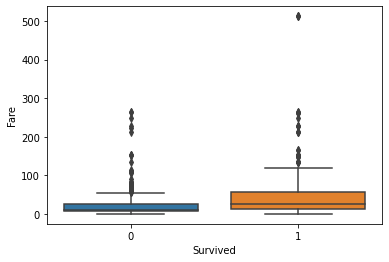

In [12]:
sns.boxplot(x='Survived',y='Fare',data=train_df);

Passengers who paid over 300

In [13]:
train_df[train_df['Fare']>300]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,1
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,1
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,1


Drop the outliers
It might be beneficial to drop those outliers for the model. Further investigation needs to be done.


The Captain went down with the ship
"The captain goes down with the ship" is a maritime tradition that a sea captain holds ultimate responsibility for both his/her ship and everyone embarked on it, and that in an emergency, he/she will either save them or die trying.

In this case, Captain Edward Gifford Crosby went down with Titanic in a heroic gesture trying to save the passengers.

In [14]:
train_df[train_df['Name'].str.contains("Capt")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0,B22,S,1


### 3(b) Embarked, Pclass and Sex:

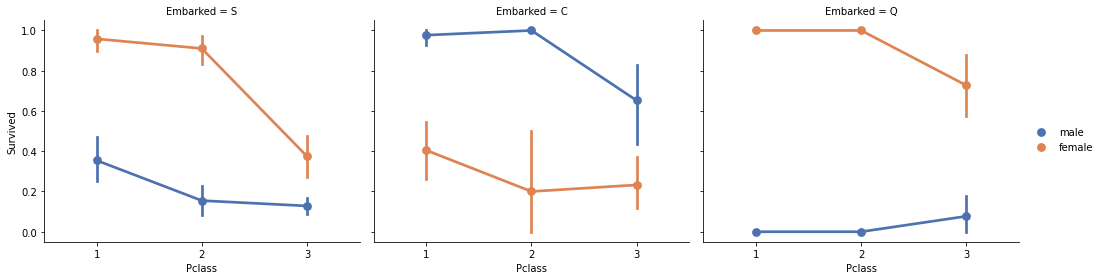

In [17]:
FacetGrid = sns.FacetGrid(train_df, col='Embarked', height=4, aspect=1.2)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', errorbar=('ci', 95.0), palette='deep', order=None, hue_order=None)
FacetGrid.add_legend();

### 3(d) :Distribution of Pclass and Survived


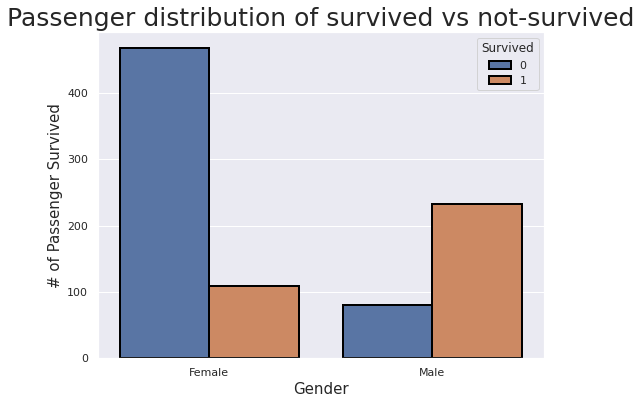

In [18]:

sns.set(style='darkgrid')
plt.subplots(figsize = (8,6))
ax=sns.countplot(x='Sex', data = train_df, hue='Survived', edgecolor=(0,0,0), linewidth=2)

# Fixing title, xlabel and ylabel
plt.title('Passenger distribution of survived vs not-survived', fontsize=25)
plt.xlabel('Gender', fontsize=15)
plt.ylabel("# of Passenger Survived", fontsize = 15)
labels = ['Female', 'Male']

# Fixing xticks.
plt.xticks(sorted(train_df.Survived.unique()),labels);

In [33]:
obj=train_df.groupby('Sex')
groups=obj.groups
groups.keys()


dict_keys(['female', 'male'])

In [35]:
groups["male"]

Index([  0,   4,   5,   6,   7,  12,  13,  16,  17,  20,
       ...
       873, 876, 877, 878, 881, 883, 884, 886, 889, 890],
      dtype='int64', length=577)

In [36]:
groups["female"]

Index([  1,   2,   3,   8,   9,  10,  11,  14,  15,  18,
       ...
       866, 871, 874, 875, 879, 880, 882, 885, 887, 888],
      dtype='int64', length=314)

In [41]:
train_df.groupby(['Sex'])[["Survived"]].mean()

,Survived
Sex,
female,0.742038
male,0.188908


As previously mentioned, women are much more likely to survive than men. 74% of the women survived, while only 18% of men survived.

In [40]:
train_df.groupby(['Sex','Pclass'])[["Survived"]].mean()

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

#We are grouping passengers based on Sex and Ticket class (Pclass). Notice the difference between survival rates between men and women.

Women are much more likely to survive than men, specially women in the first and second class. It also shows that men in the first class are almost 3-times more likely to survive than men in the third class.

### 3(e): Age and Sex distributions

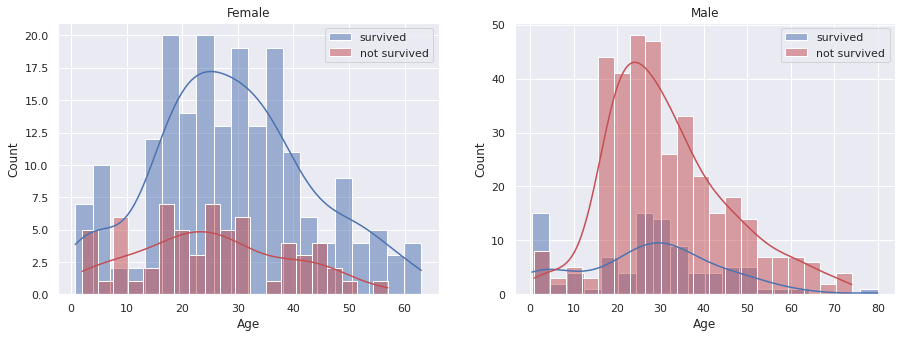

In [29]:
survived = 'survived'
not_survived = 'not survived'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']

# Plot Female Survived vs Not-Survived distribution
ax = sns.histplot(women[women['Survived']==1].Age.dropna(), bins=20, label = survived, ax = axes[0],color='b', kde=True)
ax = sns.histplot(women[women['Survived']==0].Age.dropna(), bins=20, label = not_survived, ax = axes[0],color='r', kde=True)
ax.legend()
ax.set_title('Female')

# Plot Male Survived vs Not-Survived distribution
ax = sns.histplot(men[men['Survived']==1].Age.dropna(), bins=20, label = survived, ax = axes[1],color='b', kde=True)
ax = sns.histplot(men[men['Survived']==0].Age.dropna(), bins=20, label = not_survived, ax = axes[1],color='r', kde=True)
ax.legend()
ax.set_title('Male');

We can see that men have a higher probability of survival when they are between 18 and 35 years old. For women, the survival chances are higher between 15 and 40 years old.

For men the probability of survival is very low between the ages of 5 and 18, and after 35, but that isn’t true for women. Another thing to note is that infants have a higher probability of survival.

Saving children first

In [42]:
train_df[train_df['Age']<18].groupby(['Sex','Pclass'])[["Survived"]].mean()

Survived
Sex    Pclass          
female 1       0.875000
       2       1.000000
       3       0.542857
male   1       1.000000
       2       0.818182
       3       0.232558

Children below 18 years of age have higher chances of surviving, proven they saved childen first

### 3(f): Passenger class distribution; Survived vs Non-Survived

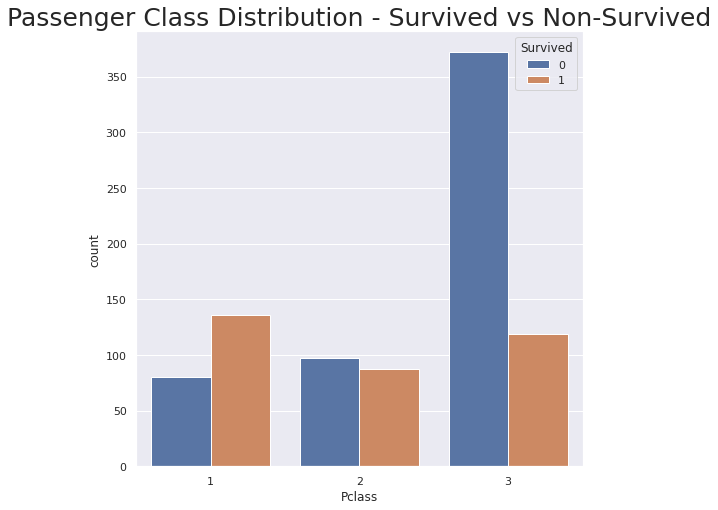

In [43]:
plt.subplots(figsize = (8,8))
ax=sns.countplot(x='Pclass',hue='Survived',data=train_df)
plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 25);

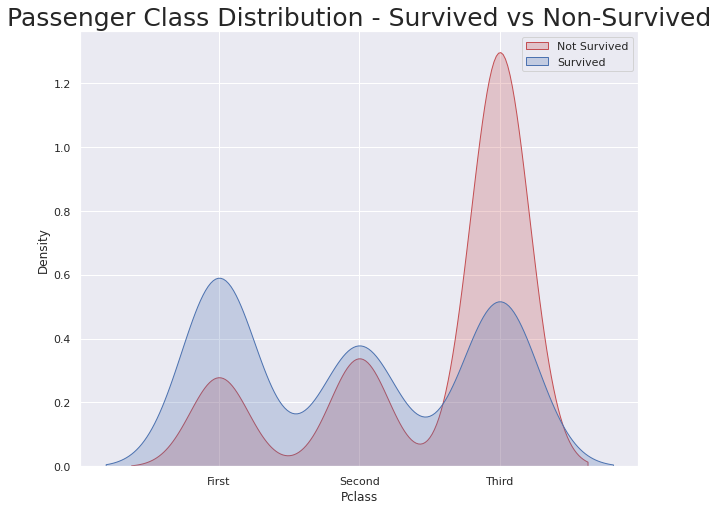

In [45]:
plt.subplots(figsize=(10,8))
ax=sns.kdeplot(train_df.loc[(train_df['Survived'] == 0),'Pclass'],fill=True,color='r',label='Not Survived')
ax.legend()
ax=sns.kdeplot(train_df.loc[(train_df['Survived'] == 1),'Pclass'],fill=True,color='b',label='Survived')
ax.legend()

plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 25)
labels = ['First', 'Second', 'Third']
plt.xticks(sorted(train_df.Pclass.unique()),labels);

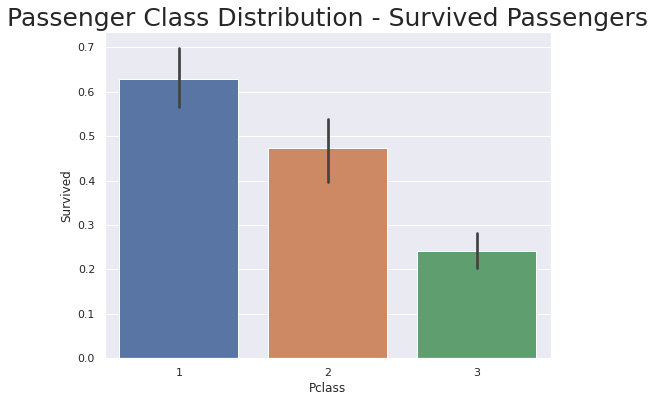

In [46]:
plt.subplots(figsize = (8,6))
sns.barplot(x='Pclass', y='Survived', data=train_df);
plt.title("Passenger Class Distribution - Survived Passengers", fontsize = 25);

The graphs above clearly shows that economic status (Pclass) played an important role regarding the potential survival of the Titanic passengers. First class passengers had a much higher chance of survival than passengers in the 3rd class. We note that:

63% of the 1st class passengers survived the Titanic wreck
48% of the 2nd class passengers survived
Only 24% of the 3rd class passengers survived

### 3(g): Correlation Matrix and Heatmap

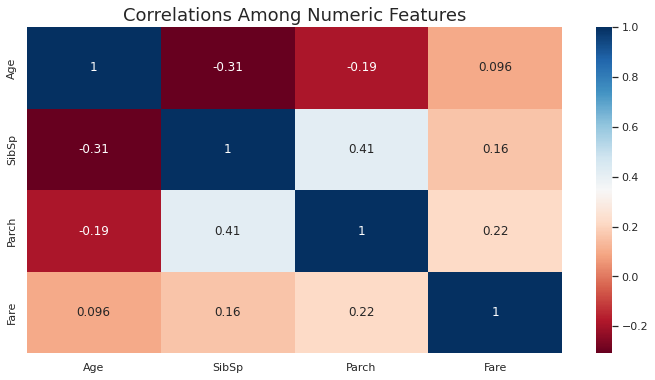

In [48]:
# Look at numeric and categorical values separately 
df_num = train_df[['Age','SibSp','Parch','Fare']]
df_cat = train_df[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]
plt.subplots(figsize = (12,6))
sns.heatmap(df_num.corr(), annot=True,cmap="RdBu")
plt.title("Correlations Among Numeric Features", fontsize = 18);

We notice from the heatmap above that:

Parents and sibling like to travel together (light blue squares)
Age has a high negative correlation with number of siblings

## STEP-4 : Feature Engineering and Data Processing



Feature Engineering is the process of using raw data to create features that will be used for predictive modeling. Using, transforming, and combining existing features to define new features are also considered to be feature engineering.

### 4(a)  Dropping the column 'PassengerId'

First, I will drop ‘PassengerId’ from the train set, because it does not contribute to a persons' survival probability. I will not drop it from the test set, since it is required for the submission.



In [55]:
train_df = train_df.drop(['PassengerId'], axis=1)
# we dropped it using the above function.
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


### 4(b): Combining SibSp and Parch

ibSp and Parch would make more sense as a combined feature that shows the total number of relatives a person has on the Titanic. I will create the new feature 'relative' below, and also a value that shows if someone is not alone.



In [56]:
data = [train_df, test_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train_df['not_alone'].value_counts()

not_alone
1    537
0    354
Name: count, dtype: int64

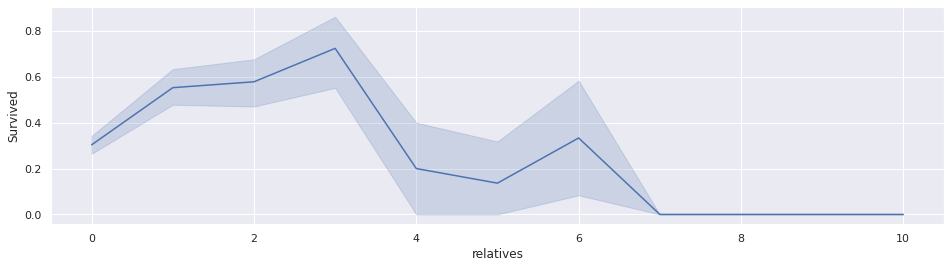

In [57]:
plt.subplots(figsize = (16,4))
ax = sns.lineplot(x='relatives',y='Survived', data=train_df)

### 4(c): Missing Data

As a reminder, we have to deal with Cabin (687 missing values), Embarked (2 missing values) and Age (177 missing values).

In [59]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train_df, test_df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)

In [60]:
# We can now drop the Cabin feature
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

AGE


As seen previously on "3(a)Dealing with Missing Values", there are a lot of missing 'Age' values (177 data points). We can normalize the 'Age' feature by creating an array that contains random numbers, which are computed based on the mean age value in regards to the standard deviation and is_null.

In [61]:
data = [train_df, test_df]

for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    
    # Compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    
    # Fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)
train_df["Age"].isnull().sum()

0

EMBARKED


Since the Embarked feature has only 2 missing values, we will fill these with the most common one.

In [62]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

We notice the most popular embark location is Southampton (S).



In [63]:

common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)
train_df['Embarked'].isnull().sum()

0

### 4(d):Converting Features

In [64]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Name        891 non-null    object 
 3   Sex         891 non-null    object 
 4   Age         891 non-null    int64  
 5   SibSp       891 non-null    int64  
 6   Parch       891 non-null    int64  
 7   Ticket      891 non-null    object 
 8   Fare        891 non-null    float64
 9   Embarked    891 non-null    object 
 10  train_test  891 non-null    int64  
 11  relatives   891 non-null    int64  
 12  not_alone   891 non-null    int64  
 13  Deck        891 non-null    int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 97.6+ KB


We can see that 'Fare' is a float data-type. Also, we need to deal with 4 categorical features: Name, Sex, Ticket, and Embarked

Fare

Converting 'Fare' from float64 to int64 using the astype() function provided by pandas

In [66]:
data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Survived    891 non-null    int64 
 1   Pclass      891 non-null    int64 
 2   Name        891 non-null    object
 3   Sex         891 non-null    object
 4   Age         891 non-null    int64 
 5   SibSp       891 non-null    int64 
 6   Parch       891 non-null    int64 
 7   Ticket      891 non-null    object
 8   Fare        891 non-null    int64 
 9   Embarked    891 non-null    object
 10  train_test  891 non-null    int64 
 11  relatives   891 non-null    int64 
 12  not_alone   891 non-null    int64 
 13  Deck        891 non-null    int64 
dtypes: int64(10), object(4)
memory usage: 97.6+ KB


NAME 


Feature Engineering the name of passengers to extract a person's title (Mr, Miss, Master, and Other), so we can build another feature called 'Title' out of it.

In [67]:
data = [train_df, test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}

for dataset in data:
    # Extract titles
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)
    
    # Replace titles with a more common title or as Other
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr','Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
    # Convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    
    # Filling NaN with 0 just to be safe
    dataset['Title'] = dataset['Title'].fillna(0)
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
# Checking results
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,train_test,relatives,not_alone,Deck,Title
0,0,3,male,22,1,0,A/5 21171,7,S,1,1,0,8,1
1,1,1,female,38,1,0,PC 17599,71,C,1,1,0,3,3
2,1,3,female,26,0,0,STON/O2. 3101282,7,S,1,0,1,8,2
3,1,1,female,35,1,0,113803,53,S,1,1,0,3,3
4,0,3,male,35,0,0,373450,8,S,1,0,1,8,1


Sex
Convert feature 'Sex' into numeric values

male = 0
female = 1

In [68]:
genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,train_test,relatives,not_alone,Deck,Title
0,0,3,0,22,1,0,A/5 21171,7,S,1,1,0,8,1
1,1,1,1,38,1,0,PC 17599,71,C,1,1,0,3,3
2,1,3,1,26,0,0,STON/O2. 3101282,7,S,1,0,1,8,2
3,1,1,1,35,1,0,113803,53,S,1,1,0,3,3
4,0,3,0,35,0,0,373450,8,S,1,0,1,8,1


TICKET

In [69]:
train_df['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

Since the 'Ticket' feature has 681 unique values, it would be very hard to convert them into an useful feature. Hence, we will drop it from the DataFrame.

In [70]:
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,train_test,relatives,not_alone,Deck,Title
0,0,3,0,22,1,0,7,S,1,1,0,8,1
1,1,1,1,38,1,0,71,C,1,1,0,3,3
2,1,3,1,26,0,0,7,S,1,0,1,8,2
3,1,1,1,35,1,0,53,S,1,1,0,3,3
4,0,3,0,35,0,0,8,S,1,0,1,8,1


Convert 'Embarked' feature into numeric values

In [71]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,train_test,relatives,not_alone,Deck,Title
0,0,3,0,22,1,0,7,0,1,1,0,8,1
1,1,1,1,38,1,0,71,1,1,1,0,3,3
2,1,3,1,26,0,0,7,0,1,0,1,8,2
3,1,1,1,35,1,0,53,0,1,1,0,3,3
4,0,3,0,35,0,0,8,0,1,0,1,8,1


### 4(e): Creating new Categories

In [72]:
data = [train_df, test_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6
# Checking the distribution
train_df['Age'].value_counts()

Age
4    170
6    162
5    156
3    135
2    106
1     94
0     68
Name: count, dtype: int64

FARE


For the 'Fare' feature, we need to do the same as with the 'Age' feature. But it isn't that easy, because if we cut the range of the fare values into a few equally big categories, 80% of the values would fall into the first category. Fortunately, we can use pandas "qcut()" function, that we can use to see, how we can form the categories.

In [73]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,train_test,relatives,not_alone,Deck,Title
0,0,3,0,2,1,0,7,0,1,1,0,8,1
1,1,1,1,5,1,0,71,1,1,1,0,3,3
2,1,3,1,3,0,0,7,0,1,0,1,8,2
3,1,1,1,5,1,0,53,0,1,1,0,3,3
4,0,3,0,5,0,0,8,0,1,0,1,8,1


In [74]:
pd.qcut(train_df['Fare'], q=6)

0      (-0.001, 7.0]
1      (52.0, 512.0]
2      (-0.001, 7.0]
3      (52.0, 512.0]
4         (7.0, 8.0]
           ...      
886      (8.0, 14.0]
887     (26.0, 52.0]
888     (14.0, 26.0]
889     (26.0, 52.0]
890    (-0.001, 7.0]
Name: Fare, Length: 891, dtype: category
Categories (6, interval[float64, right]): [(-0.001, 7.0] < (7.0, 8.0] < (8.0, 14.0] < (14.0, 26.0] < (26.0, 52.0] < (52.0, 512.0]]

Using the values from pd.qcut() to create bins for Fare

In [75]:
data = [train_df, test_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7) & (dataset['Fare'] <= 8), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 8) & (dataset['Fare'] <= 14), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 14) & (dataset['Fare'] <= 26), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 26) & (dataset['Fare'] <= 52), 'Fare']   = 4
    dataset.loc[dataset['Fare'] > 52, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)
# Checking the dataset
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,train_test,relatives,not_alone,Deck,Title
0,0,3,0,2,1,0,0,0,1,1,0,8,1
1,1,1,1,5,1,0,5,1,1,1,0,3,3
2,1,3,1,3,0,0,0,0,1,0,1,8,2
3,1,1,1,5,1,0,5,0,1,1,0,3,3
4,0,3,0,5,0,0,1,0,1,0,1,8,1
5,0,3,0,2,0,0,1,2,1,0,1,8,1
6,0,1,0,6,0,0,4,0,1,0,1,5,1
7,0,3,0,0,3,1,3,0,1,4,0,8,4
8,1,3,1,3,0,2,2,0,1,2,0,8,3
9,1,2,1,1,1,0,4,1,1,1,0,8,3


## STEP-5:  Model building

In [76]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()

### 5(a): Stochastic Gradient Descent (SGD)

In [77]:

sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)

Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

# Print score
print(round(acc_sgd,2,), "%")

79.69 %


### 5(b): Decision Tree

In [78]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred = decision_tree.predict(X_test)

acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

# Print score
print(round(acc_decision_tree,2,), "%")

93.27 %


### 5(c): Random Forest

In [79]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

# Print score
print(round(acc_random_forest,2,), "%")

93.27 %


### 5(d): Logistic Regression

In [80]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

# Print score
print(round(acc_log,2,), "%")

81.59 %


### 5(e): KNN

In [81]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)

acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

# Print score
print(round(acc_knn,2,), "%")

86.64 %


### 5(f): Gaussian Naive Bayes

In [83]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)

Y_pred = gaussian.predict(X_test)

acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

# Print score
print(round(acc_gaussian,2,), "%")

78.68 %


### 5(g): Perceptron

In [84]:

perceptron = Perceptron(max_iter=1000)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

# Print score
print(round(acc_perceptron,2,), "%")

64.87 %


## STEP-6: Model evaluation

In [85]:
results = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
93.27,Random Forest
93.27,Decision Tree
86.64,KNN
81.59,Logistic Regression
79.69,Stochastic Gradient Decent
78.68,Naive Bayes
64.87,Perceptron


The Random Forest classifier goes on top of the Machine Learning models, followed by Decision Tree and KNN respectfully. Now we need to check how the Random Forest performs by using cross validation.

### 6(a): K-Fold Cross Validation

K-Fold Cross Validation randomly splits the training data into K subsets called folds. Image we split our data into 4 folds (K = 4). The random forest model would be trained and validated 4 times, using a different fold for validation every time, while it would be trained on the remaining 3 folds.

The image below shows the process, using 4 folds (K = 4). Every row represents one training + validation process. In the first row, the model is trained on the second, third and fourth subsets and validated on the first subset. In the second row, the model is trained on the first, third and fourth subsets and validated on the second subset. K-Fold Cross Validation repeats this process until every fold acted once as an evaluation fold.

In [86]:
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.78888889 0.84269663 0.73033708 0.82022472 0.85393258 0.84269663
 0.78651685 0.78651685 0.84269663 0.83146067]
Mean: 0.8125967540574282
Standard Deviation: 0.03678278278564409


This looks much more realistic than before. The Random Forest classifier model has an average accuracy of 81% with a standard deviation of 3.9%. The standard deviation tell us how precise the estimates are.

This means the accuracy of our model can differ ± 3.9%
I believe the accuracy looks good. Since Random Forest is a model easy to use, we will try to increase its performance even further in the following section.



### 6(b): Random Forest

In [87]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(12)

,importance
feature,
Title,0.216
Sex,0.161
Age,0.147
Fare,0.114
Deck,0.090
Pclass,0.087
relatives,0.063
Embarked,0.048
SibSp,0.039


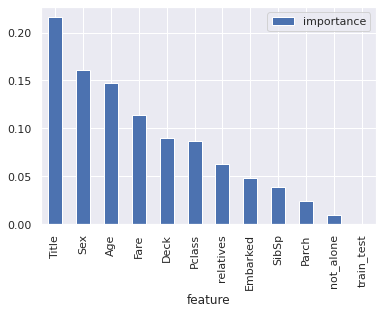

In [88]:
importances.plot.bar();

### 6(d): Results


'not_alone' and 'Parch' don't play a significant role in the Random Forest classifiers prediction process. Thus, I will drop them from the DataFrame and train the classifier once again. We could also remove more features, however, this would inquire more investigations of the feature's effect on our model. For now, I will only remove 'not_alone' and 'Parch' from the DataFrame.

In [92]:

# Dropping not_alone
train_df  = train_df.drop("not_alone", axis=1)
test_df  = test_df.drop("not_alone", axis=1)

# Dropping Parch
train_df  = train_df.drop("Parch", axis=1)
test_df  = test_df.drop("Parch", axis=1)
# # Reassigning features
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]

X_test  = test_df.drop("PassengerId", axis=1).copy()

Training the Random Forest classifier once again

In [96]:
random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

# Print scores
print(round(acc_random_forest,2,), "%")

93.27 %


Feature importance without 'not_alone' and 'Parch' features

In [94]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(12)

,importance
feature,
Title,0.216
Sex,0.166
Age,0.150
Fare,0.104
Deck,0.093
relatives,0.091
Pclass,0.088
Embarked,0.049
SibSp,0.042


The Random Forest model predicts as good as it did before. A general rule is that, the more features you have, the more likely your model will suffer from overfitting and vice versa. But I think our data looks fine for now and hasn't too much features.

Moreover, there is another way to validate the Random Forest classifier, which is as accurate as the score used before. We can use something called Out of Bag (OOB) score to estimate the generalization accuracy. Basically, the OOB score is computed as the number of correctly predicted rows from the out of the bag sample.

In [97]:
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 81.58999999999999 %



Now we can start tuning the hyperameters of random forest

### 6(e): Hyperparameter Tuning

In [99]:
# Simple performance reporting function
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [400,450,500,550],
               'criterion':['gini','entropy'],
               'bootstrap': [True],
               'max_depth': [15, 20, 25],
               'max_features': ['sqrt','sqrt', 10],
               'min_samples_leaf': [2,3],
               'min_samples_split': [2,3]}
                                  
clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(X_train,Y_train)

# Print score
clf_performance(best_clf_rf,'Random Forest')

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Random Forest
Best Score: 0.8428535559600778
Best Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 15, 'max_features': 10, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 400}


Random Forest
Best Score: 0.8383842822170611
Best Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 400}

### 6(f): Testing new parameters

In [102]:
random_forest = RandomForestClassifier(criterion = "gini",
                                       max_depth = 20,
                                       max_features='sqrt',
                                       min_samples_leaf = 3, 
                                       min_samples_split = 2,
                                       n_estimators=450,
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 83.28 %


### 6(g): Further evaluation

Confusion Matrix

In [103]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[495,  54],
       [ 95, 247]])


The first row is about the not-survived-predictions: 494 passengers were correctly classified as not survived (called true negatives) and 55 where wrongly classified as not survived (false positives).

The second row is about the survived-predictions: 98 passengers where wrongly classified as survived (false negatives) and 244 where correctly classified as survived (true positives).

A confusion matrix produces an idea of how accurate the model is.

### 6(h): Precision and Recall

In [104]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(Y_train, predictions))
print("Recall:",recall_score(Y_train, predictions))

Precision: 0.8205980066445183
Recall: 0.7222222222222222


Our model predicts correctly that a passenger survived 81% of the time (precision). The recall tells us that 71% of the passengers tested actually survived.

### 6(i):F-score

It is possible to combine precision and recall into one score, which is called the F-score. The F-score is computed with the harmonic mean of precision and recall. Note that it assigns more weight to low values. As a result, the classifier will only get a high F-score if both recall and precision are high.

In [105]:

from sklearn.metrics import f1_score
f1_score(Y_train, predictions)

0.7682737169517885


There we have it, a 76% F-score. The score is not high because we have a recall of 71%. Unfortunately, the F-score is not perfect, because it favors classifiers that have a similar precision and recall. This can be a problem because often times we are searching for a high precision and other times a high recall. An increase of precision can result in a decrease of recall, and vice versa (depending on the threshold). This is called the precision/recall trade-off.

### 6(j): Precision Recall Cur

For each person the Random Forest algorithm has to classify, it computes a probability based on a function and it classifies the person as survived (when the score is bigger the than threshold) or as not survived (when the score is smaller than the threshold). That’s why the threshold plays an important part in this process.

Let's plot the precision and recall with the threshold using matplotlib.

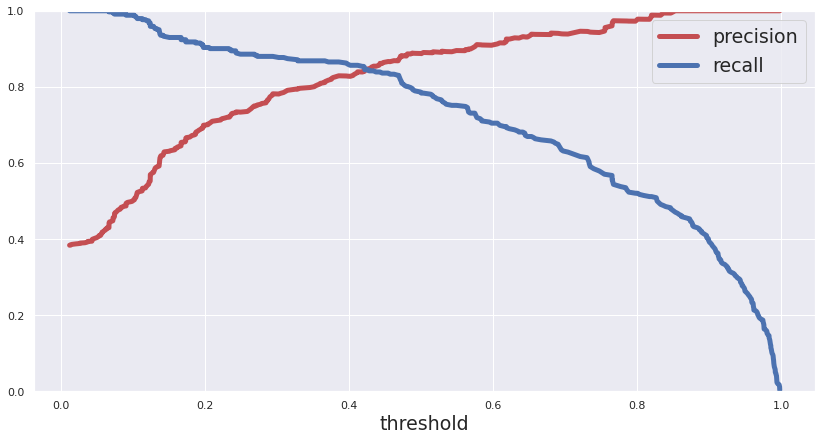

In [106]:
from sklearn.metrics import precision_recall_curve

# Getting the probabilities of our predictions
y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(Y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

We can see in the graph above that the recall is falling of rapidly when the precision reaches around 85%. Thus, we may want to select the precision/recall trade-off before this point (maybe at around 75%).

Now we are able to choose a threshold, that gives the best precision/recall trade-off for the current problem. For example, if a precision of 80% is required, we can easily look at the plot and identify the threshold needed, which is around 0.4. Then we could train the model with exactly that threshold and expect the desired accuracy.



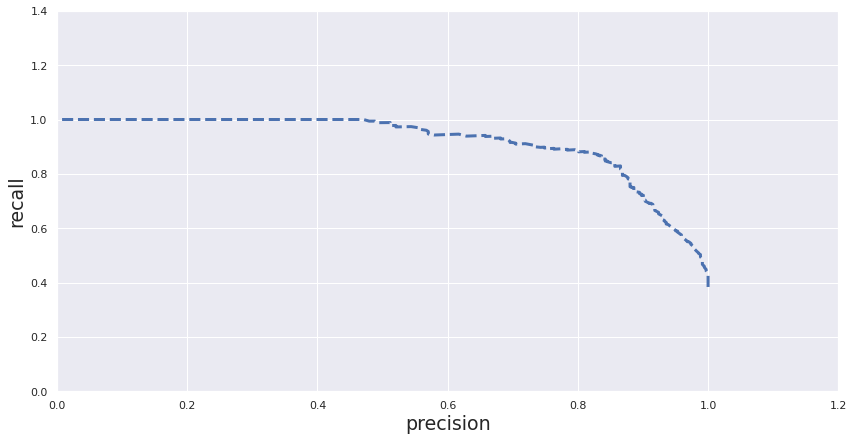

In [107]:
#another way
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "b--", linewidth=3)
    plt.xlabel("precision", fontsize=19)
    plt.ylabel("recall", fontsize=19)
    plt.axis([0, 1.2, 0, 1.4])

plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

### 6(k): ROC AUC Curve

Another way to evaluate and compare binary classifiers is the ROC AUC Curve. This curve plots the true positive rate (also called recall) against the false positive rate (ratio of incorrectly classified negative instances), instead of plotting the precision versus the recall values.

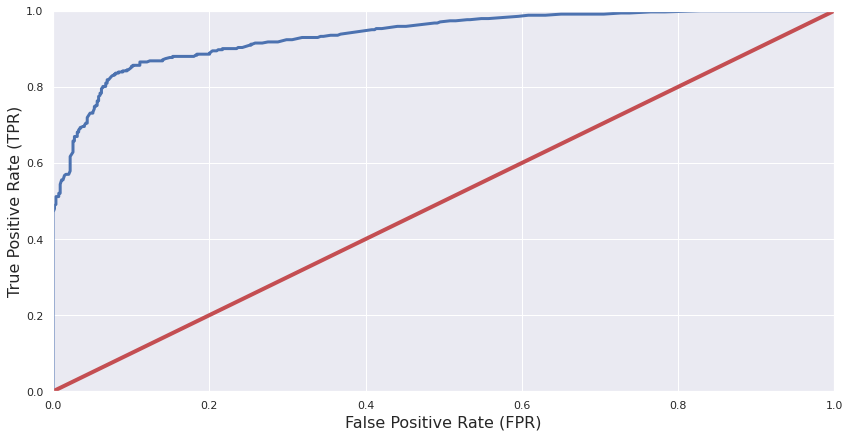

In [108]:
from sklearn.metrics import roc_curve

# Compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_scores)

# Plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=3, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

he red line represents a purely random classifier (e.g. a coin flip). Thus, the classifier should be as far away from it as possible. The Random Forest model looks good.

There's a tradeoff here because the classifier produces more false positives the higher the true positive rate is.

### 6(l): ROC AUC Score


The ROC AUC Score is the corresponding score to the ROC AUC Curve. It is simply computed by measuring the area under the curve, which is called AUC.

A classifier that is 100% correct would have a ROC AUC Score of 1, and a completely random classifier would have a score of 0.5.

In [109]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(Y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9358296317600315



We got a 93% ROC AUC Score

In [110]:
from IPython.display import Image
from IPython.core.display import HTML
Image(url="https://img.freepik.com/premium-vector/happy-thanksgiving-day-thank-you-typographic-greeting-design-template_649214-1012.jpg?w=740",height=400,width=400)